# Fashion MNIST Classification
- with a convilution network
- https://github.com/zalandoresearch/fashion-mnist
    - 60000 training, 10000 test
    - $28\times28$ grayscale
    - Highest test accuracy: 0.939 by Google AutoML, 24 compute hours
- https://github.com/dsgiitr/d2l-pytorch/tree/master/Ch05_Linear_Neural_Networks

## Pooling Layer
&nbsp; `8. HE Filtering with Conv2D Layer`에서 Convolution Layer에 대해 설명했다. Image Recognition을 위해서는 Convolution Layer가 추출한 특징을 sub-samplingg하는 Pooling Layer가 필요하다. 특징을 추출한 후 그 중 중요한 부분만 건져내는 과정을 수행하는 것이다. 


![image1](https://blogfiles.pstatic.net/MjAyMDAzMjRfMTUy/MDAxNTg1MDQyMDU0MzIx.2DU1EA9VRqAeqkjKhjHC49f4gvYH1WecjVLcE3gEDScg.X8bhlM2HmxsAOvfikWZeoUZCS6n6-Yfp2VcAYpkAwiYg.JPEG.mint_vkkk/1212.JPG?type=w2)


&nbsp; 위 그림은 convolution 연산을 통해 출력된 activation map을 pooling하는 과정을 보여준다. pooling을 하면 크기는 분명히 작하지나, 추력되는 채널의 개수는 동일하다. 

![image2](https://blogfiles.pstatic.net/MjAyMDAzMjRfNSAg/MDAxNTg1MDQyNjkzMjg2.ZnYzDenrheO-Unso9fY-BiSz4NLjLnFoDlpdpFYawVYg.ADOy6rfoYhGSAV8j2Dp12p8FTnOH4sFdvS6hTwnMErog.JPEG.mint_vkkk/1313.JPG?type=w2)

&nbsp;  Pooling에는 주로 Max Pooling이라는 방법을 사용한다. Max Pooling은 위 그림과 같은 연산을 수행한다. 필터의 크기를 (2 x 2)로 입력했을 때, 필터 내의 수 중 가장 큰 숫자만을 가져와 샘플링하는 것이다. Pooling 의 필터는 가중치가 따로 존재하지 않으며, 필터와 겹치는 부분의 숫자 중 중요 부분만 추출해 낸다는 점에서 Convolution 연산의 필터와 차이점을 갖는다.
 Pooling에는 Average Pooling이라는 방법도 있다. 필터 안의 숫자를 평균하는 것이라고 보면 된다.  Average Pooling은 downsize가 가능하나, 중요 정보를 추출하는 것은 불가능하기에 feature extraction 과정에서는 Max Pooling을 주로 사용한다.


## FC Layer
![image3](https://blogfiles.pstatic.net/MjAyMDAzMjRfMTA3/MDAxNTg1MDQzNDg4MTkz.dvp3mz5U0XYWvOphCvQgehTIZzDCEXDLwtWQ3ZITA7wg.P4ZZXeKSRiOb40UIafJl6hpS7Cew-phomlhditoE2CAg.PNG.mint_vkkk/CNN-Architecture-Types-of-Layers-700x376.png?type=w2)

 Fully-connected layer는 우리가 이전에 배운 DNN 레이어이다. 이름에서 알 수 있듯이, 네트워크의 처음부터 끝까지를 연결했다는 의미이다. Fully-connected layer는 주로 세 가지 레이어로 구성되어있다.

 Flatten : 이전 레이어를 하나의 벡터로 평평하게 만들어 다음 레이어의 input값으로 사용할 수 있게 한다.
 Dense (ReLU) : Flatten한 값을 받아 옳은 label값을 예측하기 위한 가중치를 학습한다. ReLU 를 활성함수로 취한다.
 Dense (Softmax) : 학습한 내용을 바탕으로 분류를 수행한다. Softmax를 활성함수로 사용한다.

 FC layer는 새로 가중치를 주어 학습한다는 점에서 과적합 문제가 발생하고, 전체 CNN보다 더 많은 파라미터를 사용하며, feature의 위치정보가 모두 사라진다는 단점이 있다. 이를 해결하기 위한 방법이 바로 FC layer 대신 Global Average Pooling을 사용하는 것이다. GAP는 출력된 각 채널에 대해 전체적으로 평균을 내주는 것으로, 이 평균값을 분류에 사용한다.


## Fashion MNIST Classification with Conv Network
&nbsp; 간단한 Convolution Network를 만들어 Fashion MNIST를 학습하고 이를 Linear Network와 비교해볼 것이다.

In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline
import sys
import os
import time

import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [2]:
xforms = transforms.Compose([transforms.ToTensor(),
                             ])

dataset = {'train': torchvision.datasets.FashionMNIST('../data', train=True, download=True, transform=xforms),
           'val' : torchvision.datasets.FashionMNIST('../data', train=False, download=True, transform=xforms) }

Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw


Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw


Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
def get_data_loader(batch_size):
    data_loader = { tv: torch.utils.data.DataLoader(dataset[tv], batch_size=batch_size, shuffle=True)
                   for tv in dataset.keys()}
    return data_loader

batch_size = 5
data_loader = get_data_loader(batch_size)

torch.Size([5, 1, 28, 28])


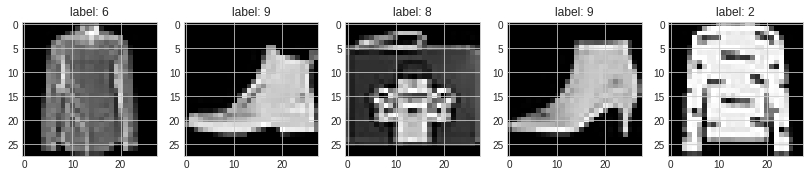

In [9]:
for im, lbl in data_loader['train']:
    print(im.shape)
    fig, axes = plt.subplots(1,im.shape[0], figsize=(14,8))
    for i in range(im.shape[0]):
        axes[i].imshow(im[i].reshape(28,28), cmap='gray')
        axes[i].set_title(f'label: {lbl[i]}')
    break

## Training Loop

In [10]:
loss_fn = nn.CrossEntropyLoss()

def training_loop(n_epochs, optim, model, loss_fn, dl_train, dl_val, hist=None, lr_scheduler=None):
    if hist is not None:
        pass
    else:
        hist = {'tloss': [], 'tacc': [], 'vloss': [], 'vacc': []}
    #
    if lr_scheduler is not None:
        lr = []
        
    best_acc = 0
    for epoch in range(1, n_epochs+1):
        tr_loss, tr_acc = 0., 0.
        n_data = 0
        for im_batch, label_batch in dl_train: # minibatch
            im_batch, label_batch = im_batch.to(device), label_batch.to(device)
            ypred = model(im_batch)
            loss_train = loss_fn(ypred, label_batch)
        
            optim.zero_grad()
            loss_train.backward()
            optim.step()
            
            # accumulate correct prediction
            tr_acc  += (torch.argmax(ypred.detach(), dim=1) == label_batch).sum().item() # number of correct predictions
            tr_loss += loss_train.item() * im_batch.shape[0]
            n_data  += im_batch.shape[0]
        # end mini-batch loop
        
        # statistics
        tr_loss /= n_data
        tr_acc  /= n_data
        #
        val_loss, val_acc = performance(model, loss_fn, dl_val)
        
        if epoch <= 5 or epoch % 10 == 0 or epoch == n_epochs:
             print(f'Epoch {epoch}, tloss {tr_loss:.4f} t_acc: {tr_acc:.4f}  vloss {val_loss:.4f}  v_acc: {val_acc:.4f}')
        
        # best accuracy
        if best_acc < val_acc:
            best_acc = val_acc
            print(f' >> best val accuracy updated: {best_acc} at epoch {epoch}.')
        #
        # record for history return
        if hist is not None:
            hist['tloss'].append(tr_loss)
            hist['vloss'].append(val_loss) 
            hist['tacc'].append(tr_acc)
            hist['vacc'].append(val_acc)
            
        if lr_scheduler is not None:
            lr.append(lr_scheduler.get_last_lr()) # the lr used in optim.
            lr_scheduler.step()
        # end epoch-loop
        
    if lr_scheduler is not None:
        hist['lr'] = lr
        
    print ('finished training_loop().')
    return hist
#

def performance(model, loss_fn, dataloader):
    model.eval()
    with torch.no_grad():
        loss, acc, n = 0., 0., 0.
        for x, y in dataloader:
            x, y = x.to(device), y.to(device)
            ypred = model(x)
            loss += loss_fn(ypred, y).item() * len(y)
            p = torch.argmax(ypred, dim=1)
            acc += (p == y).sum().item()
            n += len(y)
        #
    loss /= n
    acc /= n
    return loss, acc
#
def plot_history(history):
    fig, axes = plt.subplots(1,2, figsize=(16,6))
    axes[0].set_title('Loss'); 
    axes[0].plot(history['tloss'], label='train'); axes[0].plot(history['vloss'], label='val')
    axes[0].legend()
    max_vacc = max(history['vacc'])
    axes[1].set_title(f'Acc. vbest: {max_vacc:.2f}')
    axes[1].plot(history['tacc'], label='train'); axes[1].plot(history['vacc'], label='val')
    axes[1].legend()
#

## Model with Three Linear Blocks

In [ ]:
class Reshape(torch.nn.Module):
    def forward(self, x):
        return x.view(-1, 784) # (Batch, Features)

In [171]:
class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        
        self.Conv2d = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, )
        self.BatchNorm = nn.BatchNorm2d(out_channels)
        self.activation = nn.ELU()

    def forward(self, input):
        x = self.Conv2d(input)
        x = self.BatchNorm(x)
        x = self.activation(x)

        return x


class MNISTNetwork(nn.Module):
    def __init__(self, n_channels, n_target):
        super().__init__()

        self.Hidden_1 = ConvBlock(1, n_channels )  
        self.Hidden_2 = ConvBlock(n_channels, n_channels*2 )
        self.Pool_1 = nn.MaxPool2d(kernel_size = 2)
        self.Hidden_3 = ConvBlock(n_channels*2, n_channels*4)  
        self.Pool_2 = nn.AvgPool2d(kernel_size = 10)
        self.Flatten = nn.Flatten()
        self.Linear = nn.Linear(n_channels*4, n_target)

    def forward(self, input):
        x = self.Hidden_1(input)
        x = self.Hidden_2(x)
        x = self.Pool_1(x)
        x = self.Hidden_3(x)
        x = self.Pool_2(x)
        x = self.Flatten(x)
        x = self.Linear(x)

        return x

In [172]:
batch_size = 128
data_loader = get_data_loader(batch_size)

In [173]:
n_channels = 64
n_targets = 10

In [174]:
model = MNISTNetwork(n_channels, n_targets).to(device)
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(model)
print(total_params)

MNISTNetwork(
  (Hidden_1): ConvBlock(
    (Conv2d): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1))
    (BatchNorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ELU(alpha=1.0)
  )
  (Hidden_2): ConvBlock(
    (Conv2d): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (BatchNorm): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ELU(alpha=1.0)
  )
  (Pool_1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Hidden_3): ConvBlock(
    (Conv2d): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (BatchNorm): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ELU(alpha=1.0)
  )
  (Pool_2): AvgPool2d(kernel_size=10, stride=10, padding=0)
  (Flatten): Flatten()
  (Linear): Linear(in_features=256, out_features=10, bias=True)
)
373130


## Train Setting

In [175]:
learning_rate = 0.1
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
stepLR = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.9)

criterion = torch.nn.CrossEntropyLoss().to(device)
history = None

## Training

In [176]:
%%time
history = training_loop(40, optimizer, model, criterion, data_loader['train'], data_loader['val'], history, stepLR )

Epoch 1, tloss 0.8497 t_acc: 0.6988  vloss 0.7140  v_acc: 0.7436
 >> best val accuracy updated: 0.7436 at epoch 1.
Epoch 2, tloss 2.0413 t_acc: 0.6388  vloss 0.7745  v_acc: 0.7152
Epoch 3, tloss 0.6486 t_acc: 0.7579  vloss 0.5538  v_acc: 0.7943
 >> best val accuracy updated: 0.7943 at epoch 3.
Epoch 4, tloss 0.5223 t_acc: 0.8080  vloss 0.4992  v_acc: 0.8168
 >> best val accuracy updated: 0.8168 at epoch 4.
Epoch 5, tloss 0.4611 t_acc: 0.8342  vloss 0.5742  v_acc: 0.7993
 >> best val accuracy updated: 0.8531 at epoch 6.
 >> best val accuracy updated: 0.8625 at epoch 7.
 >> best val accuracy updated: 0.871 at epoch 9.
Epoch 10, tloss 0.3225 t_acc: 0.8832  vloss 0.3697  v_acc: 0.8679
 >> best val accuracy updated: 0.8807 at epoch 11.
 >> best val accuracy updated: 0.8868 at epoch 12.
 >> best val accuracy updated: 0.8902 at epoch 13.
 >> best val accuracy updated: 0.8922 at epoch 14.
 >> best val accuracy updated: 0.8983 at epoch 15.
 >> best val accuracy updated: 0.9008 at epoch 16.
 >> 

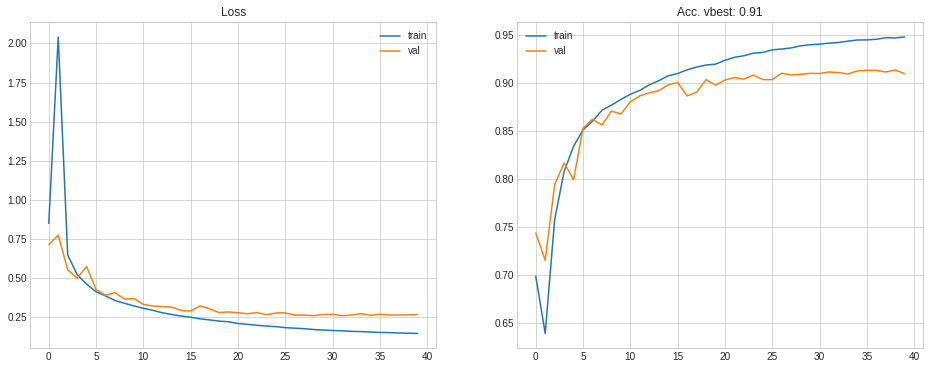

In [177]:
plot_history(history)

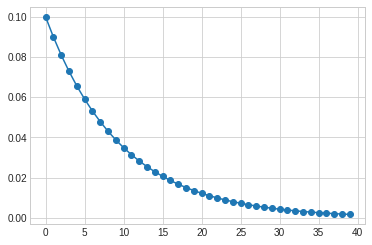

In [178]:
plt.plot(history['lr'], '-o')

## Conclusion
- 간단한 CNN 모델이었음에도 불구하고 Linear Network보다 더 좋은 성능을 보인다.
- 경험적으로 Global Average Pooling을 사용했을 때가 사용하지 않았을 때보다 overfitting에 덜 취약하다. 
